In [2]:
import sys
sys.path.append("../")

import torch
from data import cityscapes
from trainer import Solver
import matplotlib.pyplot as plt
from models import fcn_resnet50, fcn_resnet18, fcn_resnet34
import torchvision

%load_ext autoreload
%autoreload 2

# Load and visualize Data

In [3]:
train_dataset = cityscapes.train_dataset("../cityscapes")
val_dataset = cityscapes.val_dataset("../cityscapes")
num_classes = len(train_dataset.classes)

/Users/normankarr/anaconda3/envs/torch_env/lib/python3.7/site-packages/torchvision/transforms/functional.py:127: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:141.)
  img = torch.as_tensor(np.asarray(pic))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


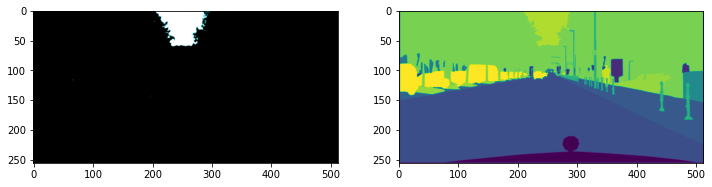

In [4]:
img, smnt = train_dataset[3]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.imshow(img.permute(1,2,0))
ax2.imshow(smnt)
plt.show()

# Training loop

In [5]:
train_loader = cityscapes.train_dataloader('../cityscapes', 2)
val_loader = cityscapes.val_dataloader('../cityscapes', 2)

In [6]:
model = fcn_resnet18(num_classes)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
solver = Solver("resnet18", model, train_loader, val_loader, device)

In [7]:
solver.train(criterion, optimizer)

Training 0.27%: Loss inf
Epoch 0 Completed in 2.70 Seconds
Training Loss: 0.00962 Validation Loss: 0.02150


([tensor(0.0096, grad_fn=<DivBackward0>)], [tensor(0.0215)])